# Heart Disease Prediction

## Main Goals
- Predict whether a patient is at risk of heart disease based on medical records.
- Bin continuous features
    - Group numerical data like age and cholesterol into meaningful categories.
- Create interaction terms between features.
- Apply feature scaling (standardization).

### Context
Heart disease remains a leading cause of mortality worldwide, making early detection and risk assessment crucial for preventive care and improving patient outcomes. The ability to identify high-risk individuals before a critical event occurs allows for timely intervention through lifestyle changes and medical treatment. In the field of data science, predictive modeling offers a valuable tool for analyzing complex patient data to uncover subtle risk factors. This project leverages a real-world dataset of past patient medical records to build a classification model that predicts the presence of heart disease, enabling a more data-driven approach to cardiovascular risk assessment.

## 1. Loading in the Data
For this project, we will use the [Heart Disease Prediction Dataset](https://www.kaggle.com/datasets/mfarhaannazirkhan/heart-dataset) from Kaggle. In accordance with Kaggle licenses, please directly visit the Kaggle website and download the `cleaned_merged_heart_dataset.csv` dataset for this activity, and then upload the file to the same directory as the notebook file.

We can start by loading in the dataset into a pandas dataframe, and then displaying it to ensure it loaded correctly, and so we can see what the features are and how the target is displayed. This means that we have to start by importing pandas as well.

It's worth mentioning that anytime you have a dataset from an external source, such as Kaggle, you can and should refer back to the source of the data to clear up misconceptions and also to get a better understanding of the data.

In [1]:
#Import pandas
import pandas as pd

#Read the CSV file
df = pd.read_csv('cleaned_merged_heart_dataset.csv')

#Display the data, and describe it too
display(df)
print(df.describe())

,age,sex,cp,trestbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1883,60,1,0,140,207,0,0,138,1,1.9,2,1,3,0
1884,46,1,0,140,311,0,1,120,1,1.8,1,2,3,0
1885,59,1,3,134,204,0,1,162,0,0.8,2,2,2,0
1886,54,1,1,154,232,0,0,164,0,0.0,2,1,2,0


               age          sex           cp     trestbps         chol  \
count  1888.000000  1888.000000  1888.000000  1888.000000  1888.000000   
mean     54.354343     0.688559     1.279131   131.549258   246.855403   
std       9.081505     0.463205     1.280877    17.556985    51.609329   
min      29.000000     0.000000     0.000000    94.000000   126.000000   
25%      47.750000     0.000000     0.000000   120.000000   211.000000   
50%      55.000000     1.000000     1.000000   130.000000   241.000000   
75%      61.000000     1.000000     2.000000   140.000000   276.000000   
max      77.000000     1.000000     4.000000   200.000000   564.000000   

               fbs      restecg     thalachh        exang      oldpeak  \
count  1888.000000  1888.000000  1888.000000  1888.000000  1888.000000   
mean      0.148305     0.597458   149.424258     0.331568     1.053761   
std       0.355496     0.638820    23.006153     0.470901     1.161344   
min       0.000000     0.000000    71

### Understanding the Data

Displaying and describing our data allows us to see that our data has loaded in properly, as well as what feaatures we have. Using the describe() function also tells us valuable information, such as the number of values in each feature, and other statistics of the data. Using both information from this displayed dataframe, as well as information from the source of the data, which in this case is Kaggle, we'll take note and clarify some of these features.

- `cp`: Chest pain type. Values: 0 = Typical angina, 1 = Atypical angina, 2 = Non-anginal pain, 3 = Asymptomatic. (angina is a type of pain that occurs when your muscles doesn't get enough oxygen rich blood. If unstable, could indicate a heart attack)
- `trestbps`: Resting blood pressure (in mm Hg)
- `chol`:  The amount of cholesterol in the patient's blood, measured in mg/dl.
- `fbs`:  Fasting blood sugar > 120 mg/dl. Values: 1 = true, 0 = false. (What a patient's blood sugar is after fasting)
- `restecg`: Resting electrocardiographic results. Values: 0 = Normal, 1 = ST-T wave abnormality, 2 = Left ventricular hypertrophy.
- `thalach`: Maximum heart rate achieved
- `exang`: Exercise-induced angina. Values: 1 = yes, 0 = no. Strong predictor.
- `oldpeak`: ST depression induced by exercise relative to rest. (This refers to the ST Segment of the EKG waveform from the ecg)
- `slope`: Slope of the peak exercise ST segment. Values: 0 = Upsloping, 1 = Flat, 2 = Downsloping (This describes the shape of the EKG's ST segment during peak exercise.)
- `ca`: Number of major vessels (0-3) colored by fluoroscopy. A direct measure of the number of blocked major arteries. Values: 0, 1, 2, 3.
- `thal`: Thalassemia types (results of a Thallium Stress Test, a nuclear imaging scan that shows how well blood is flowing to the heart muscle.)
- `target`: Whether or not the patient is at risk of a heart attack. This is also referred to as whether a patient has a diagnosed level of heart disease. Since heart disease is more of an umbrella of symptoms and diseases, it is often just referred to as the risk of a heart attack. Saying that also gives more urgency to the situation.

Please note that while we did attempt to clarify the features as much as possible, we are not medical professionals, and this is purely for informational purposes. For any kind of diagnosis or medical advice, please consult a professional. 

For our project and our goals however, this will be plenty. With our data cleared up, let's move on to preprocessing our data.

## 2. Preprocessing
This is where we will be cleaning up the data to make it ready for any other tranformations and our model. Fortunately for us, we are given a cleaned dataset for this project that has already dealt with minor issues such as null entires. Oftentimes in a work environment, another team might help out and provide you a clean dataset to work with, minimizing the amount of work you have to do in the preprocessing steps. As our goal is to help others learn these techniques, we'll still perform a basic null entry check. While it would not be necessary since it has been specified to be cleaned, it's still a good habit to check.

In [2]:
#Check for missing values
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalachh    0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


As suspected, the dataset is filled out and doesn't have any missing values. As such, we can move on to the next stage of preprocessing for this dataset. 

### Binning Continous Features

We have a lot of features that are currently just continous values, such as age or cholesterol. In a medical scenario, it might actually be more beneficial to create bins, or ranges for our data. For example, we can bin together ages 40-50 and 50-60 to see if there are any common problems between those ages. Another example of this might be with blood pressure, as the difference between blood pressures of 116 and 119 might be meaningless, the difference between blood pressures of 138 and 142 are not (as it crosses the threshold for hypertension). It's a practice that helps medical institutions quickly identify possible problems, and is something we can do as well to help our model identify patterns and correlations as well. 

Fortunately, pandas has a function for this exact purpose, so it won't be a lot of work. We'll go ahead and create bins for `age`, `chol`, `trestbps`, and `thalachh` using .cut().

In [ ]:
#Binning age
#Define the edges for the bins. Ages will be grouped into these ranges.
age_bins = [0, 39, 49, 59, 120] # Bins for <40, 40-49, 50-59, 60+

#Define the labels for each bin.
age_labels = ['<40', '40-49', '50-59', '60+']

#Create the new binned column.
df['age_binned'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

#Binning trestbps
#Define bins based on clinical hypertension stages.
trestbps_bins = [0, 119, 129, 139, 220] # Bins for Normal, Elevated, HTN S1, HTN S2

#Define the labels for each bin.
trestbps_labels = ['Normal', 'Elevated', 'Hypertension S1', 'Hypertension S2']

#Create the new binned column.
df['trestbps_binned'] = pd.cut(df['trestbps'], bins=trestbps_bins, labels=trestbps_labels, right=True)

#Binning chol
#Define bins based on clinical guidelines for cholesterol.
chol_bins = [0, 199, 239, 600] # Bins for Desirable, Borderline High, High

#Define the labels for each bin.
chol_labels = ['Desirable', 'Borderline High', 'High']

#Create the new binned column.
df['chol_binned'] = pd.cut(df['chol'], bins=chol_bins, labels=chol_labels, right=True)

#Binning 'thalachh' (Max Heart Rate)
#Define bins based on general cardiovascular response.
thalach_bins = [0, 139, 165, 220] # Bins for Low-to-Moderate, Moderate-to-High, High

#Define the labels for each bin.
thalach_labels = ['Low-to-Moderate', 'Moderate-to-High', 'High']

#Create the new binned column.
df['thalach_binned'] = pd.cut(df['thalachh'], bins=thalach_bins, labels=thalach_labels, right=True)


#Displaying our results
print("Data After Binning:")
print(df.head())

Data After Binning:
   age  sex  cp  trestbps  chol  fbs  restecg  thalachh  exang  oldpeak  \
0   63    1   3       145   233    1        0       150      0      2.3   
1   37    1   2       130   250    0        1       187      0      3.5   
2   41    0   1       130   204    0        0       172      0      1.4   
3   56    1   1       120   236    0        1       178      0      0.8   
4   57    0   0       120   354    0        1       163      1      0.6   

   slope  ca  thal  target age_binned  trestbps_binned      chol_binned  \
0      0   0     1       1        60+  Hypertension S2  Borderline High   
1      0   0     2       1        <40  Hypertension S1             High   
2      2   0     2       1      40-49  Hypertension S1  Borderline High   
3      2   0     2       1      50-59         Elevated  Borderline High   
4      2   0     2       1      50-59         Elevated             High   

     thalach_binned  
0  Moderate-to-High  
1              High  
2           

Viewing the head of the dataframe shows us that we now have four new features, which are the categorical versions of our original features. For graphing analysis and other potentical calculations, we'll hold off on removing the original columns for now.

### Encoding Categorical Features
While we did just bin our data, it was done by creating more categorical features. Many models aren't capable of taking in categorical data and expect purely numerical or boolean data. As such, we'll go ahead and encode our newly create columns through one-hot encoding. We'll be creating a new feature for every possible output in a specific feature. We can do this simply with the .get_dummies function from pandas.

In [4]:
#One-hot encode our binned columns
df = pd.get_dummies(df, columns=['age_binned', 'trestbps_binned', 'chol_binned', 'thalach_binned'], drop_first=True)

#Display the final DataFrame
display(df.head())
print(df.columns)

,age,sex,cp,trestbps,chol,fbs,restecg,thalachh,exang,oldpeak,...,age_binned_40-49,age_binned_50-59,age_binned_60+,trestbps_binned_Elevated,trestbps_binned_Hypertension S1,trestbps_binned_Hypertension S2,chol_binned_Borderline High,chol_binned_High,thalach_binned_Moderate-to-High,thalach_binned_High
0,63,1,3,145,233,1,0,150,0,2.3,...,False,False,True,False,False,True,True,False,True,False
1,37,1,2,130,250,0,1,187,0,3.5,...,False,False,False,False,True,False,False,True,False,True
2,41,0,1,130,204,0,0,172,0,1.4,...,True,False,False,False,True,False,True,False,False,True
3,56,1,1,120,236,0,1,178,0,0.8,...,False,True,False,True,False,False,True,False,False,True
4,57,0,0,120,354,0,1,163,1,0.6,...,False,True,False,True,False,False,False,True,True,False


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target', 'age_binned_40-49',
       'age_binned_50-59', 'age_binned_60+', 'trestbps_binned_Elevated',
       'trestbps_binned_Hypertension S1', 'trestbps_binned_Hypertension S2',
       'chol_binned_Borderline High', 'chol_binned_High',
       'thalach_binned_Moderate-to-High', 'thalach_binned_High'],
      dtype='object')


From displaying our dataframe and printing our columns, our categorical features have successfully been one-hot encoded. As such, we can move on from our basic preprocessing.

## 3. Visualizing the Data
In order to get a better understanding of the data, it always helps to graph out our features to see what kind of patterns and correlations may exist. It's partly for this purpose that we haven't gotten rid of the columns we originally binned, and then encoded. Graphing out these features also allows us to look for outliers, and see if we can create any interaction terms from strong correlations.

As such, let's import seaborn and matplotlib, and then go ahead and create our graph. We'll be going for a heatmap so we can directly see the correlations between features.

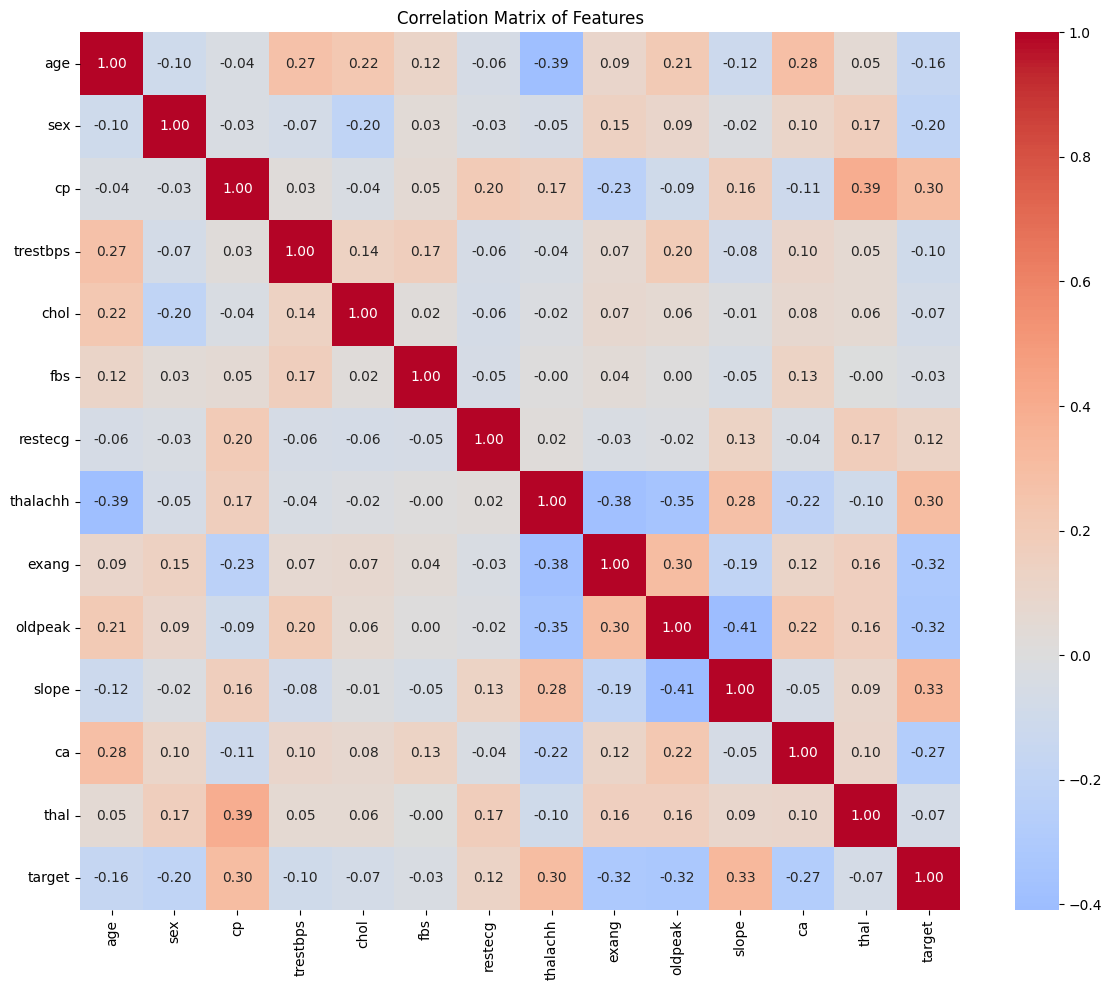

In [5]:
#Import seaborn and matplotlib for visualization
import seaborn as sns
import matplotlib.pyplot as plt

#Select only numerical columns (excluding boolean columns from one-hot encoding)
numerical_cols = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 
                 'thalachh', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

#Create correlation matrix
corr_matrix = df[numerical_cols].corr()

#Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix of Features')
plt.tight_layout()
plt.show()

The correlation matrix reveals several noteworthy relationships among the features and their connection to the presence of heart disease (represented by the target variable). Among the most positively correlated features with the target are chest pain type (cp), maximum heart rate achieved (thalachh), and slope of the ST segment during exercise (slope). These variables each show moderate positive correlations of approximately 0.30–0.33, suggesting that certain chest pain types, higher max heart rates, and particular ST segment slopes are associated with a greater likelihood of heart disease diagnosis.

On the other hand, several features display negative correlations with the target. Notably, ST depression induced by exercise (oldpeak), exercise-induced angina (exang), and the number of major vessels colored by fluoroscopy (ca) show moderate negative relationships. This means that higher values in these features are generally linked to a lower chance of a positive heart disease diagnosis, which aligns with medical expectations—higher ST depression and exercise-induced angina often indicate more serious cardiovascular stress.

Additionally, some features show strong correlations with each other, which may suggest redundancy or potential for interaction terms. For example, age and thalachh have a strong negative correlation (−0.39), reflecting the typical decline in maximum heart rate with age. Oldpeak and slope also exhibit a strong inverse relationship (−0.41), indicating they might measure similar aspects of heart function during exertion. 

With this in mind, let's move forward


## 4. Interaction Terms

Now that we have a good feel for our data from looking at the graphs, we can move on to another step in feature engineering: creating interaction terms. These are new, more powerful features that we build by combining two or more existing ones, usually by multiplying them together. The goal is to capture a special, combined effect that the model might not see from the individual features alone. So based on our heatmap, let's first list out some potentially strong interaction terms, and then create them.

- `thalachh` * `cp`

    - This combines our two of our strongest individual predictors. It tests the hypothesis that a low maximum heart rate is even more dangerous when it occurs in a patient who also experiences a specific type of chest pain (like typical angina).

- `age` * `thalachh`

    - We saw that max heart rate naturally decreases with age. This feature helps the model move beyond the raw heart rate value and assess if it's unusually low for a specific age group, which is a much stronger clinical indicator of a problem.

- `exang` * `oldpeak`

    - This feature tests whether the negative impact of ST depression (oldpeak) is amplified when the patient also experiences chest pain during exercise (exang). It helps the model weigh the combination of a physical symptom and an EKG measurement more heavily.

- `cp` * `thal`

    - This feature combines a key patient-reported symptom (chest pain type) with a definitive diagnostic test result (thallium stress test). The hypothesis is that when a specific chest pain type, like typical angina, is backed up by imaging evidence of a blood flow defect, like a reversible defect from the thal test, the predictive power is much greater than either finding alone.

- `age` * `trestbps`

    - This tests the hypothesis that high blood pressure (trestbps) becomes a more significant risk factor as a person gets older. It allows the model to treat hypertension in a 65-year-old as more severe than the same reading in a 35-year-old.

- `oldpeak` * `slope`

    - These two EKG features are already strongly correlated and describe the magnitude and shape of the same event. This interaction tests if a large ST depression (oldpeak) is especially predictive of heart disease when it occurs with a particularly concerning shape (slope), confirming a severe response to exercise from two different, but related, measurements.

In [6]:
#Create interaction terms and add them as new features to df

#thalachh * cp
df['thalachh_cp'] = df['thalachh'] * df['cp']

#age * thalachh
df['age_thalachh'] = df['age'] * df['thalachh']

#exang * oldpeak
df['exang_oldpeak'] = df['exang'] * df['oldpeak']

#cp * thal
df['cp_thal'] = df['cp'] * df['thal']

#age * trestbps
df['age_trestbps'] = df['age'] * df['trestbps']

#oldpeak * slope
df['oldpeak_slope'] = df['oldpeak'] * df['slope']

#Print out the column names to verify the new features
print(df.columns.tolist())

['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target', 'age_binned_40-49', 'age_binned_50-59', 'age_binned_60+', 'trestbps_binned_Elevated', 'trestbps_binned_Hypertension S1', 'trestbps_binned_Hypertension S2', 'chol_binned_Borderline High', 'chol_binned_High', 'thalach_binned_Moderate-to-High', 'thalach_binned_High', 'thalachh_cp', 'age_thalachh', 'exang_oldpeak', 'cp_thal', 'age_trestbps', 'oldpeak_slope']


From the displayed column names, we can see we were able to add our interaction terms successfully. Let's move on.

## 5. Test Train Split
With our data cleaned and interaction terms created, we can move on to our test-train split. This is an important step where we'll separate our target from our features, and go ahead and also split our data into testing and training data. This gives our model something to learn from, and something that can be used to check how well it performs.

We'll take this chance and also remove the orignal versions of our binned features, as we won't have anymore use for those from here on out. After doing that, we'll use the train-test split module from Sklearn to perform our data split.

In [7]:
#Import test_train_split from sklearn
from sklearn.model_selection import train_test_split

#Remove original versions of binned columns
df = df.drop(columns=['age', 'trestbps', 'chol', 'thalachh'])

#Separate features and target variable
X = df.drop(columns=['target'])
y = df['target']

#Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=64)

## 6. Standardization

Now that our data has been split into training and testing data, we can perform our final preprocessing task, which is standardization. To make sure our models don't have any bias in choosing values, we'll be scaling down all the features so that their mean is 0 and standard deviation is 1. We do this specifically since many models tend to give more priority to larger values, so features that are in the thousands by default, like the year, would get more importance than it should. 

Sklearn does this process for us fortunately, all we need to do is import the StandardScaler, fit it on the training data, and transform both training and testing data. We wait until after the train test split specifically because we want the scaler fitted on the training data to avoid data leakage.

In [8]:
#Import standard scaler
from sklearn.preprocessing import StandardScaler

#Initialize the scaler
scaler = StandardScaler()

#Fit the scaler on the training data and transform both train and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 7. Building and Training the Models
With our data completely prepared, it's time to build our models. We'll be using both, a random forest and a logistic regression for this project. They're both great at predicting binary targets. Random forests are robust and logistic regressions are quick and easy to interpret and interact with. 

We'll import the models from Sklearn, initialize them, and then train them on the training data.

In [9]:
#Import random forest classifier and logistic regression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

#Initialize the classifiers
rf = RandomForestClassifier(n_estimators=100, random_state=64)
logistic = LogisticRegression(max_iter=1000, random_state=64)

#Fit the classifiers on the training data
rf.fit(X_train_scaled, y_train)
logistic.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=64)

## 8. Evaulating our Models
With our models trained, they are ready for testing. We'll import our metrics of success from Sklearn and see how both models perform.

In [10]:
#Import metrics for evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#Make predictions on the test set
rf_predictions = rf.predict(X_test_scaled)
logistic_predictions = logistic.predict(X_test_scaled)

#Evaluate Random Forest Classifier
print("Accuracy (Random Forest):", accuracy_score(y_test, rf_predictions))
print("Classification Report (Random Forest):\n", classification_report(y_test, rf_predictions))
print("Confusion Matrix (Random Forest):\n", confusion_matrix(y_test, rf_predictions))

#Evaluate Logistic Regression Classifier
print("\nAccuracy (Logistic Regression):", accuracy_score(y_test, logistic_predictions))
print("Classification Report (Logistic Regression):\n", classification_report(y_test, logistic_predictions))
print("Confusion Matrix (Logistic Regression):\n", confusion_matrix(y_test, logistic_predictions))

Accuracy (Random Forest): 0.9788359788359788
Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       187
           1       0.98      0.98      0.98       191

    accuracy                           0.98       378
   macro avg       0.98      0.98      0.98       378
weighted avg       0.98      0.98      0.98       378

Confusion Matrix (Random Forest):
 [[183   4]
 [  4 187]]

Accuracy (Logistic Regression): 0.7936507936507936
Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           0       0.86      0.70      0.77       187
           1       0.75      0.88      0.81       191

    accuracy                           0.79       378
   macro avg       0.80      0.79      0.79       378
weighted avg       0.80      0.79      0.79       378

Confusion Matrix (Logistic Regression):
 [[131  56]
 [ 22 169]]


### Analysis
#### Confusion Matrix

The confusion matrices for both models provide insight into how effectively each classifier distinguishes between patients with a lesser risk of heart attack (class 0) and those with a higher risk of heart attack (class 1).

The Random Forest model demonstrates an incredible performance, correctly predicting 183 out of 187 class 0 cases and 187 out of 191 class 1 cases. It made very few mistake, sonly 4 false positives and 4 false negatives, indicating strong balance across both classes.

In contrast, the Logistic Regression model shows more difficulty. It correctly identifies 131 class 0 patients and 169 class 1 patients. However, it misclassifies 56 healthy individuals as having heart disease and fails to detect heart disease in 22 cases. This suggests the model is more prone to false alarms and slightly less reliable in identifying class 0 compared to the Random Forest.

#### Classification Report
Precision, recall, and F1-score further highlight the contrast in performance:

- Precision:
Random Forest achieves exceptionally high precision scores of 0.98 for both classes, meaning nearly all predictions it makes, whether for healthy or diseased patients, are accurate. Logistic Regression, on the other hand, is more conservative: its precision drops to 0.86 for class 0 and 0.75 for class 1, reflecting a greater number of false positives, especially for heart disease.

- Recall:
The Random Forest’s recall scores are equally strong at 0.98 for both classes, indicating it successfully identifies nearly every true instance. Logistic Regression shows an imbalance: while it achieves a recall of 0.88 for detecting heart disease (class 1), it only scores 0.70 for class 0. This suggests it is more sensitive to heart disease cases but sacrifices accuracy in identifying healthy individuals.

- F1-score:
With F1-scores of 0.98 for both classes, Random Forest offers nearly perfect harmonic mean between precision and recall. Logistic Regression’s F1-scores are 0.77 for class 0 and 0.81 for class 1, reflecting reasonably good but clearly lower overall performance, especially in handling the healthy class.

Macro and weighted averages across all metrics confirm the gap: Random Forest maintains consistency at 0.98, while Logistic Regression averages closer to 0.79–0.80, indicating more variability and room for improvement.

#### Overall Analysis
The Random Forest model clearly outperforms Logistic Regression in this heart disease prediction task. With an overall accuracy of 97.88%, it offers excellent balance between sensitivity and precision across both classes, making it highly reliable for clinical prediction. Meanwhile, Logistic Regression achieves a lower accuracy of 79.36%, and while it performs fairly well in detecting heart disease, it shows noticeable shortcomings in identifying patients without the condition.

This outcome aligns with expectations: Random Forest, being a more complex ensemble method, can capture nonlinear patterns and interactions between features more effectively than the simpler linear approach of Logistic Regression. However, the tradeoff is interpretability, as while Random Forest excels in performance, Logistic Regression remains more transparent and easier to explain in medical settings.

Depending on the goal, whether maximizing prediction accuracy or ensuring explainability for clinical decisions, one model may be preferred over the other (although much more work would need to be done on the logistic regression's end). Nonetheless, these results highlight the power of ensemble models for classification tasks and the importance of evaluating performance across multiple metrics, not just accuracy.

Congratulations on reaching this stage of the project and comparing models in a rigorous, thoughtful way. Whether you're building toward real-world application or deepening your machine learning knowledge, this analysis is a meaningful step forward in mastering classification and model evaluation.